# Usage GraphGenerator

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib


from sklearn.decomposition import TruncatedSVD
from eden.graph import vectorize
import umap

import numpy as np

from embedder import embedder
from evaluator import evaluator
from Graph_generator import Graph_generator

### Generate two random graphs

In [32]:
# Graph_generator.gen_graph(n_nodes, edge_probability, seed=[None])
g1 = Graph_generator.gen_graph(6,0.7)
g2 = Graph_generator.gen_graph(6,0.7)

### Starting from a original graph generete a set of graphs similar to the one in input
Graph_generator.gen_similar_graphs(graph,depth)
The procedure works as follow:  
1) Remove one edge from the graph (keeping it connecte)  
2) keep one node and change its label generating a new graph  
3) keep one edge and change its label generating a new graph   
  
Example: suppose g1 has 10 edges and 5 nodes, procedure 1) produces 10 gaphs, then procedure 2) produce 10 * 5, finally procedure 3) generates 10 * 5 * 10 graphs.  
thise procedure is repeated depth times!  
Note that the produced graphs must be conneted, so the total number of graph may be smaller than 10 * 10 * 5

In [33]:
graphs1 = Graph_generator.gen_similar_graphs(g1,2)
graphs2 = Graph_generator.gen_similar_graphs(g2,2)
print(len(graphs1))
print(len(graphs2))

94003
94003


### From the sets pick N graphs randomly.

In [34]:
# pick n random grpahs from the set
n_graphs = 1000
np.random.shuffle(graphs1)
np.random.shuffle(graphs2)
graphs1 = graphs1[0:n_graphs]
graphs2 = graphs2[0:n_graphs]
print(len(graphs1))
print(len(graphs2))

1000
1000


### Append the label and create an unique set

In [35]:
graphs = []
labels = []
for g in graphs1:
    graphs.append(g)
    labels.append(0)
for g in graphs2:
    graphs.append(g)
    labels.append(1)
print(len(graphs))

2000


### Split the training set

In [36]:
# split the graphs and the labels
X_train, X_test, y_train, y_test = train_test_split(graphs, labels, test_size=0.3
                                                    , random_state=0)
y_test = [[i] for i in y_test]
y_test = np.ravel(y_test)
y_train = [[i] for i in y_train]
y_train = np.ravel(y_train)

### Test it using Vectorize and PCA

6 fold cross validation

mean accuracy :  0.9115108177484416
std accuracy  : 0.023923421616746748


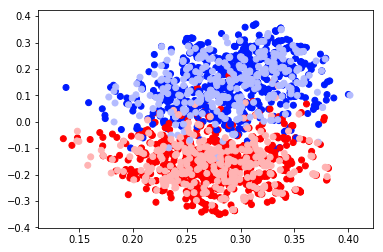

In [37]:
fit_transform_evalute_pca(X_train,X_test,y_test,y_train)

### Test it using Vectorize and UMAP

6 fold cross validation

mean accuracy :  0.9483468346834684
std accuracy  : 0.006787610419260787


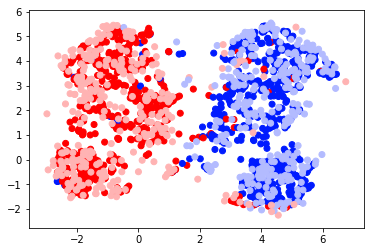

In [38]:
fit_transform_evalute_umap(X_train,X_test,y_test,y_train)

# GENERATE MORE COMPLEX DATA

In order to genereate more complex data, we start to genrete graphs from the same original graph

In [4]:
# generate original grpah
g3 = Graph_generator.gen_graph(6,0.5)

# create two sets starting from the same graph
graphs3 = Graph_generator.gen_similar_graphs(g3,2)
graphs4 = Graph_generator.gen_similar_graphs(g3,2)
print(len(graphs3))
# take only 500 graphs
n_graphs = 1000
np.random.shuffle(graphs3)
np.random.shuffle(graphs4)
graphs3 = graphs3[0:n_graphs]
graphs4 = graphs4[0:n_graphs]

#add the labels
graphs = []
labels = []
for g in graphs3:
    graphs.append(g)
    labels.append(0)
for g in graphs4:
    graphs.append(g)
    labels.append(1)

    
# split the graphs and the labels
X_train, X_test, y_train, y_test = train_test_split(graphs, labels, test_size=0.3
                                                    , random_state=0)
y_test = [[i] for i in y_test]
y_test = np.ravel(y_test)
y_train = [[i] for i in y_train]
y_train = np.ravel(y_train)

5747


### USING PCA

6 fold cross validation

mean accuracy :  0.6031571490482383
std accuracy  : 0.02341784526987238


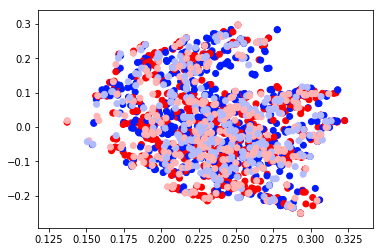

In [7]:
fit_transform_evalute_pca(X_train,X_test,y_test,y_train)

### USING UMAP

In [ ]:
fit_transform_evalute_umap(X_train,X_test,y_test,y_train)

used methods

In [6]:
def fit_transform_evalute_pca(X_train,X_test,y_test,y_train):
    mean_accuracy = []
    std_accuracy = []

    dimension_embedding = 2

    #instanziate models
    pca = TruncatedSVD(n_components=dimension_embedding)
    vectoriz = "vectorize"

    embed = embedder(pca,vectoriz)
    evalu = evaluator()

    embed.fit(X_train)
    Xd_train = embed.transform(X_train)
    
    evalu.fit(Xd_train,y_train)
    Xd_test = embed.transform(X_test)
    mean,std = evalu.evaluate_with_kfold(Xd_test, y_test, 6)
    
    print("6 fold cross validation")
    print("")
    print("mean accuracy : ",mean)
    print("std accuracy  :",std)
    
    colors1 = ['#FF0000','#001BFF']
    colors2 = ['#FFB3B3','#B3BBFF']


    plt.scatter(Xd_train[:,0],Xd_train[:,1],c=y_train, 
                cmap=matplotlib.colors.ListedColormap(colors1))
    plt.scatter(Xd_test[:,0],Xd_test[:,1],c=y_test, 
                cmap=matplotlib.colors.ListedColormap(colors2))
    plt.show()
    
    
    
    
def fit_transform_evalute_umap(X_train,X_test,y_test,y_train):
    mean_accuracy = []
    std_accuracy = []

    dimension_embedding = 2

    #instanziate models
    uma = umap.UMAP(n_components=dimension_embedding)
    vectoriz = "vectorize"

    embed = embedder(uma,vectoriz)
    evalu = evaluator()

    embed.fit(X_train)
    Xd_train = embed.transform(X_train)
    
    evalu.fit(Xd_train,y_train)
    Xd_test = embed.transform(X_test)
    mean,std = evalu.evaluate_with_kfold(Xd_test, y_test, 6)
    
    print("6 fold cross validation")
    print("")
    print("mean accuracy : ",mean)
    print("std accuracy  :",std)
    
    colors1 = ['#FF0000','#001BFF']
    colors2 = ['#FFB3B3','#B3BBFF']


    plt.scatter(Xd_train[:,0],Xd_train[:,1],c=y_train, 
                cmap=matplotlib.colors.ListedColormap(colors1))
    plt.scatter(Xd_test[:,0],Xd_test[:,1],c=y_test, 
                cmap=matplotlib.colors.ListedColormap(colors2))
    plt.show()
    

6 fold cross validation

mean accuracy :  0.5318181818181817
std accuracy  : 0.1157197715929745


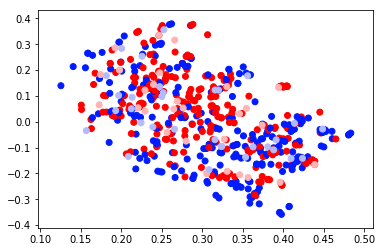

In [34]:
# take only 500 graphs
n_graphs = 300
np.random.shuffle(graphs3)
np.random.shuffle(graphs4)
graphs3 = graphs1[0:n_graphs]
graphs4 = graphs2[0:n_graphs]

#add the labels
graphs = []
labels = []
for g in graphs3:
    graphs.append(g)
    labels.append(0)
for g in graphs4:
    graphs.append(g)
    labels.append(1)

    
# split the graphs and the labels
X_train, X_test, y_train, y_test = train_test_split(graphs, labels, test_size=0.1
                                                    , random_state=0)
y_test = [[i] for i in y_test]
y_test = np.ravel(y_test)
y_train = [[i] for i in y_train]
y_train = np.ravel(y_train)

fit_transform_evalute_pcaT(X_train,X_test,y_test,y_train)

In [33]:
def fit_transform_evalute_pcaT(X_train,X_test,y_test,y_train):
    mean_accuracy = []
    std_accuracy = []

    dimension_embedding = 2

    #instanziate models
    pca = TruncatedSVD(n_components=dimension_embedding)
    vectoriz = "vectorize"

    embed = embedder(pca,vectoriz)
    evalu = evaluator()

    embed.fit(X_train)
    Xd_train = embed.transform(X_train)
    
    evalu.fit(Xd_train,y_train)
    Xd_test = embed.transform(X_test)
    mean,std = evalu.evaluate_with_kfold(Xd_test, y_test, 6)
    
    print("6 fold cross validation")
    print("")
    print("mean accuracy : ",mean)
    print("std accuracy  :",std)
    
    colors1 = ['#FF0000','#001BFF']
    colors2 = ['#FFB3B3','#B3BBFF']


    plt.scatter(Xd_train[:,0],Xd_train[:,1],c=y_train, 
                cmap=matplotlib.colors.ListedColormap(colors1))
    plt.scatter(Xd_test[:,0],Xd_test[:,1],c=y_test, 
                cmap=matplotlib.colors.ListedColormap(colors2))
    plt.show()
    

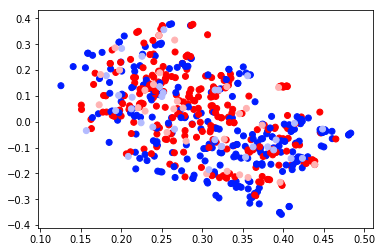

In [17]:
mean_accuracy = []
std_accuracy = []

dimension_embedding = 2

#instanziate models
pca = TruncatedSVD(n_components=dimension_embedding)
vectoriz = "vectorize"

embed = embedder(pca,vectoriz)
evalu = evaluator()

embed.fit(X_train)
Xd_train = embed.transform(X_train)
print("end_fitting")
evalu.fit(Xd_train,y_train)
print("start_test")
Xd_test = embed.transform(X_test)
mean,std = evalu.evaluate_with_kfold(Xd_test, y_test, 6)

print(mean,std)

end_fitting
start_test
0.7794767528223411 0.06756369546223667


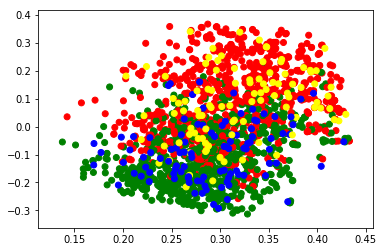

In [18]:
import matplotlib.pyplot as plt
import matplotlib

colors1 = ['red','green']
colors2 = ['yellow','blue']


plt.scatter(Xd_train[:,0],Xd_train[:,1],c=y_train, cmap=matplotlib.colors.ListedColormap(colors1))
plt.scatter(Xd_test[:,0],Xd_test[:,1],c=y_test, cmap=matplotlib.colors.ListedColormap(colors2))


In [20]:
mean_accuracy = []
std_accuracy = []

dimension_embedding = 2

#instanziate models
uma = umap.UMAP(n_components=dimension_embedding)
vectoriz = "vectorize"

embed = embedder(uma,vectoriz)
evalu = evaluator()

embed.fit(X_train)
Xd_train = embed.transform(X_train)
print("end_fitting")
evalu.fit(Xd_train,y_train)
print("start_test")
Xd_test = embed.transform(X_test)
mean,std = evalu.evaluate_with_kfold(Xd_test, y_test, 6)

print(mean,std)

end_fitting
start_test
0.8264817290552585 0.07518234276335796


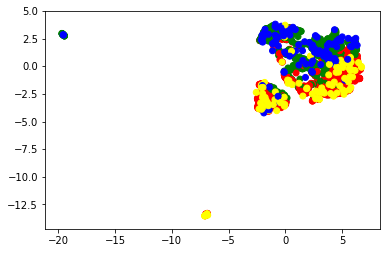

In [21]:
import matplotlib.pyplot as plt
import matplotlib

colors1 = ['red','green']
colors2 = ['yellow','blue']


plt.scatter(Xd_train[:,0],Xd_train[:,1],c=y_train, cmap=matplotlib.colors.ListedColormap(colors1))
plt.scatter(Xd_test[:,0],Xd_test[:,1],c=y_test, cmap=matplotlib.colors.ListedColormap(colors2))

6 fold cross validation

mean accuracy :  0.5318181818181817
std accuracy  : 0.1157197715929745


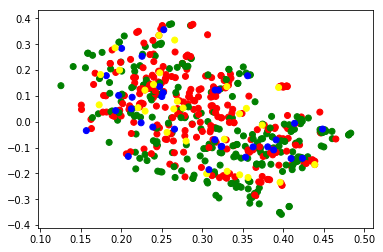

In [6]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
class Graph_generator:

    
    '''
    Generate similar graphs, take in input a graph, and produce a list of graphs
    '''
    def gen_similar_graphs(g,deept=1):
        #delete one edge from the original grpah
        graphs = Graph_generator.gen_delete_edge([g])
        graphs_change_node_att = Graph_generator.gen_change_node_label(graphs)
        
        for g in graphs_change_node_att:
            graphs.append(g)
            
        graphs_change_edge_att = Graph_generator.gen_change_edge_label(graphs)
        for g in graphs_change_edge_att:
            graphs.append(g)
    
        deept = deept - 1 
        
        # for each graph in graphs_change_node_att, repeat the procedure:
        # 1) remove one arch, chagne all the labels one at each time

        for i in range (0,deept):
            graph2 = Graph_generator.gen_delete_edge(graphs_change_node_att)
            graph3 = Graph_generator.gen_change_node_label(graph2)

            for i in graph2:
                graphs.append(i)
            for i in graph3:
                graphs.append(i)
            
            graph4 = Graph_generator.gen_change_edge_label(graphs)
            for i in graph4:
                graphs.append(i)


        return(graphs)
    def gen_change_edge_label(graphs):
        graph_chagne_edge = []
        n_nodes = len(graphs[0].nodes())
        for t in graphs:
            for n in t.edges(data=True):
                t_tmp = t.copy()
                lab = np.random.randint(n_nodes)
                t_tmp.add_edge(n[0],n[1],label=lab)
                graph_chagne_edge.append(t_tmp)
        return (graph_chagne_edge)

    '''
    From a given list of grphs, change randomly the label of the node.
    at each etaration only ONLY one label is changed
    '''
    def gen_change_node_label(graphs):

        graphs_change_node_att=[]
        n_nodes = len(graphs[0].nodes())
        for t in graphs:
            for n in t.nodes():
                t_tmp = t.copy()
                lab = np.random.randint(n_nodes)
                t_tmp.add_node(n,label=lab)
                graphs_change_node_att.append(t_tmp)

        return (graphs_change_node_att)

    '''
    From a given grpah delete one edge, at each time verify that the graph is sitll connected
    return an array of graphs
    '''
    def gen_delete_edge(graphs):
        
        graphs_deleted_edge = []
        for g in graphs:
            for e in g.edges():
                g_tmp = g.copy()
                g_tmp.remove_edge(e[0],e[1])
                if (nx.is_connected(g_tmp)):
                    graphs_deleted_edge.append(g_tmp)

        return(graphs_deleted_edge)


    '''
    Generate a CONNECTED graph with random node and edge labels
    return a nx graph
    '''
    def gen_graph(n_nodes,prob_edge, seed=None):
        g = nx.random_geometric_graph(n_nodes,prob_edge,seed=seed)
        for n in g.nodes():
            lab = np.random.randint(n_nodes)
            g.add_node(n,label=lab)
            del g.node[n]['pos']
        for e in g.edges():
            att1 = np.random.randint(n_nodes)
            g.add_edge(e[0],e[1],label=att1)
                      
        if (nx.is_connected(g)):
            return(g)
        else:
            if (seed == None):
                seed=np.random.randint(100)
            else:
                seed = seed + 1
            return(Graph_generator.gen_graph(n_nodes,prob_edge,seed))


    def myplot(G,n_label='label'):
        pos = nx.spring_layout(G,seed =4)

        nx.draw(G, pos)
        node_labels = nx.get_node_attributes(G,n_label)
        nx.draw_networkx_labels(G, pos, labels = node_labels)
        edge_labels = nx.get_edge_attributes(G,'')
        nx.draw_networkx_edge_labels(G, pos, labels = edge_labels)

        plt.show()

In [283]:
g = Graph_generator.gen_graph(5,0.5,10)

g1 = Graph_generator.gen_similar_graphs(g,4)
len(g1)


    

2736

TypeError: isinstance() arg 2 must be a type or tuple of types

In [266]:
g=Graph_generator.gen_graph(5,0.5,10)
len(Graph_generator.gen_similar_graphs(g))

936

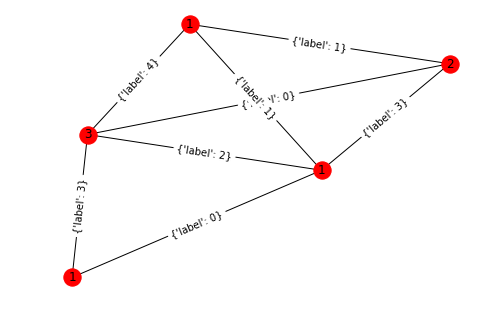

In [54]:
g = Graph_generator.gen_graph(5,0.5)
del_edge = Graph_generator.gen_delete_edge(g)
len(del_edge)
Graph_generator.myplot(g)

[[0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0.]
 [1. 1. 0. 0. 1.]
 [1. 1. 0. 0. 0.]]
(0, 2, {'weight': 1.0})
(0, 4, {'weight': 1.0})
(0, 3, {'label': 4})
(0, 1, {'label': 1})
(1, 3, {'label': 3})
(1, 4, {'label': 2})
(1, 2, {'label': 1})
(2, 3, {'label': 4})
(3, 4, {'label': 3})


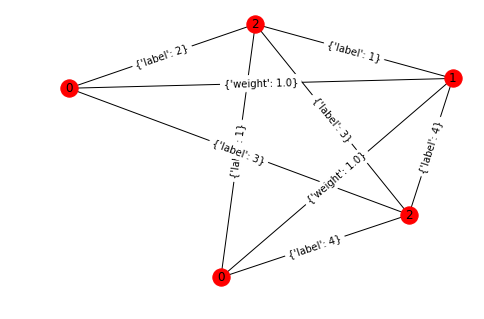

(0, {'pos': [0.2630527308554478, 0.7328892198364786], 'label': 3})
(1, {'pos': [0.21208112747687413, 0.6138645540693211], 'label': 0})
(2, {'pos': [0.12302456596885236, 0.18520002836286453], 'label': 1})
(3, {'pos': [0.6843885114298351, 0.7891785207573324], 'label': 3})
(4, {'pos': [0.3559853161944233, 0.1975573615474593], 'label': 0})
